In [497]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.simplefilter('ignore')

In [498]:
train=pd.read_csv(r"../input/covid19-global-forecasting-week-4/train.csv")
test=pd.read_csv(r"../input/covid19-global-forecasting-week-4/test.csv")

In [499]:
train.sample(6)

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
6383,6384,Beijing,China,2020-03-20,491.0,8.0
32948,32949,Virginia,US,2020-03-20,122.0,2.0
16782,16783,NaN,Israel,2020-05-08,16436.0,245.0
7405,7406,Heilongjiang,China,2020-03-07,481.0,13.0
32459,32460,Texas,US,2020-02-20,0.0,0.0
7607,7608,Hong Kong,China,2020-02-08,26.0,1.0


In [500]:
test.sample(6)

,ForecastId,Province_State,Country_Region,Date
13030,13031,Turks and Caicos Islands,United Kingdom,2020-04-03
3151,3152,Liaoning,China,2020-04-14
9246,9247,NaN,Sierra Leone,2020-04-03
9999,10000,NaN,Timor-Leste,2020-04-25
1145,1146,NaN,Bhutan,2020-04-29
12726,12727,Bermuda,United Kingdom,2020-05-13


In [501]:
df = train.fillna('NA').groupby(['Country_Region','Province_State','Date'])['ConfirmedCases'].sum() \
                          .groupby(['Country_Region','Province_State']).max().sort_values() \
                          .groupby(['Country_Region']).sum().sort_values(ascending = False)

top10 = pd.DataFrame(df).head(10)
top10

,ConfirmedCases
Country_Region,
US,1442653.0
Russia,262843.0
United Kingdom,238005.0
Spain,230183.0
Italy,223885.0
Brazil,220291.0
France,179630.0
Germany,175233.0
Turkey,146457.0


In [502]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'India') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases")
fig.update_layout(title_text='Confirmed COVID-19 cases per day in India')
fig.show()

In [503]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'US') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases")
fig.update_layout(title_text='Confirmed COVID-19 cases per day in US')
fig.show()

In [504]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'China') &(df_by_date.Date >= '2020-01-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases")
fig.update_layout(title_text='Confirmed COVID-19 cases per day in China')
fig.show()

In [505]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'Spain') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases")
fig.update_layout(title_text='Confirmed COVID-19 cases per day in Spain')
fig.show()

In [506]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'Germany') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases")
fig.update_layout(title_text='Confirmed COVID-19 cases per day in Germany')
fig.show()

In [507]:
df=train.groupby(['Date','Country_Region']).agg('sum').reset_index()
df.tail(5)

,Date,Country_Region,Id,ConfirmedCases,Fatalities
21155,2020-05-15,Vietnam,35535,314.0,0.0
21156,2020-05-15,West Bank and Gaza,35650,375.0,2.0
21157,2020-05-15,Western Sahara,35765,6.0,0.0
21158,2020-05-15,Zambia,35880,654.0,7.0
21159,2020-05-15,Zimbabwe,35995,42.0,4.0


In [508]:
def pltCountry_cases(ConfirmedCases,*argv):
    f, ax=plt.subplots(figsize=(16,5))
    labels=argv
    for a in argv: 
        country=df.loc[(df['Country_Region']==a)]
        plt.plot(country['Date'],country['ConfirmedCases'],linewidth=3)
        plt.xticks(rotation=40)
        plt.legend(labels)
        ax.set(title='Evolution of the number of cases' )

In [509]:
def pltCountry_fatalities(Fatalities,*argv):
    f, ax=plt.subplots(figsize=(16,5))
    labels=argv
    for a in argv: 
        country=df.loc[(df['Country_Region']==a)]
        plt.plot(country['Date'],country['Fatalities'],linewidth=3)
        plt.xticks(rotation=40)
        plt.legend(labels)
        ax.set(title='Evolution of the number of fatalities' )

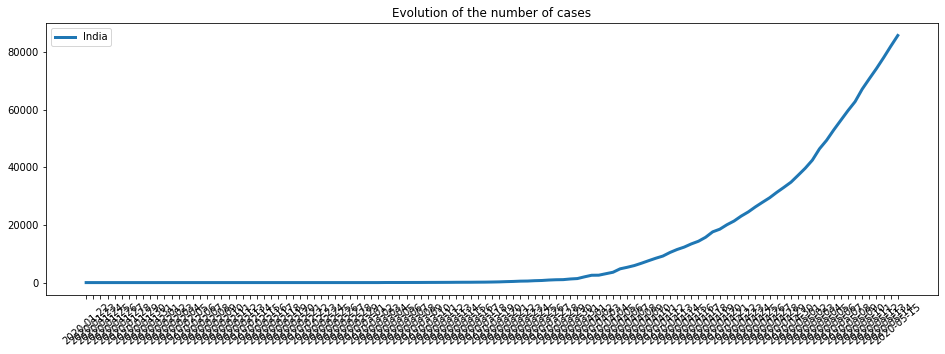

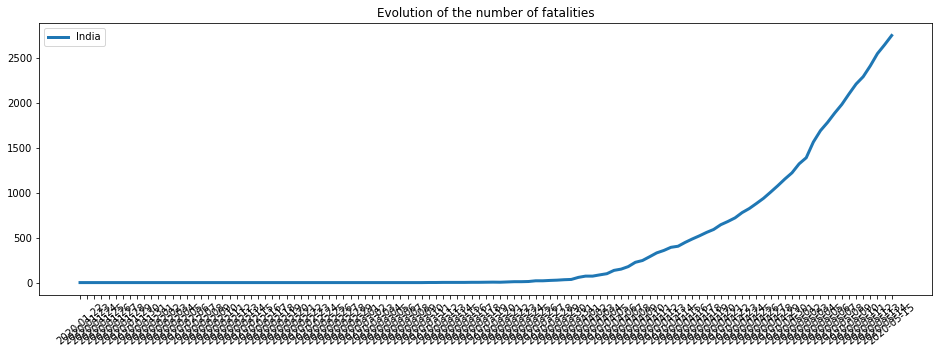

In [510]:
pltCountry_cases('ConfirmedCases','India')
pltCountry_fatalities('Fatalities','India')

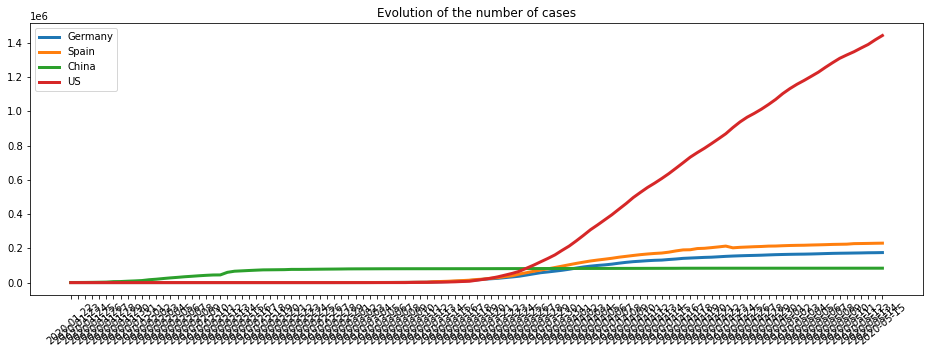

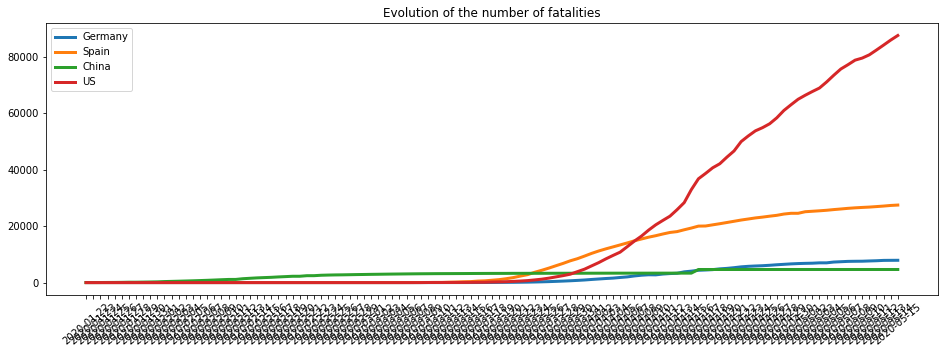

In [511]:
pltCountry_cases('ConfirmedCases', 'Germany','Spain','China','US')
pltCountry_fatalities('Fatilities','Germany','Spain','China','US')

In [512]:
test['Date'] = pd.to_datetime(test['Date'])
train['Date'] = pd.to_datetime(train['Date'])

In [513]:
case='ConfirmedCases'
def timeCompare(time,*argv):
    Coun1=argv[0]
    Coun2=argv[1]
    f,ax=plt.subplots(figsize=(16,5))
    labels=argv  
    country=df.loc[(df['Country_Region']==Coun1)]
    plt.plot(country['Date'],country[case],linewidth=2)
    plt.xticks([])
    plt.legend(labels)
    ax.set(title=' Evolution of actual cases',ylabel='Number of cases' )

    country2=df.loc[df['Country_Region']==Coun2]
    plt.plot(country2['Date'],country2[case],linewidth=2)
    plt.legend(labels)
    ax.set(title=' Cases in India Vs Cases in %s '%argv[1] ,ylabel='Number of %s cases'%case, xlabel='Time' )

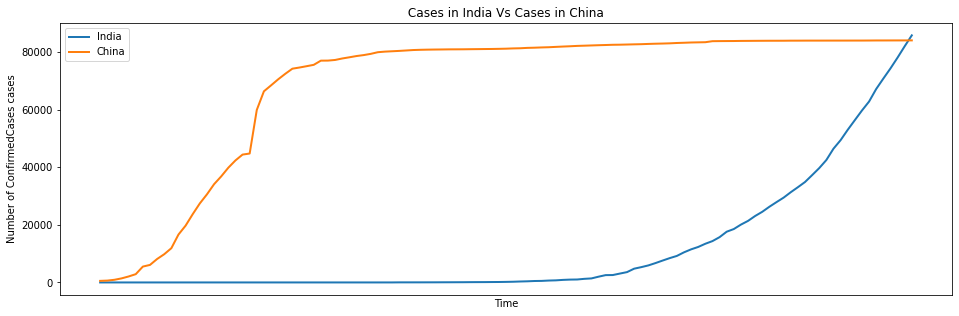

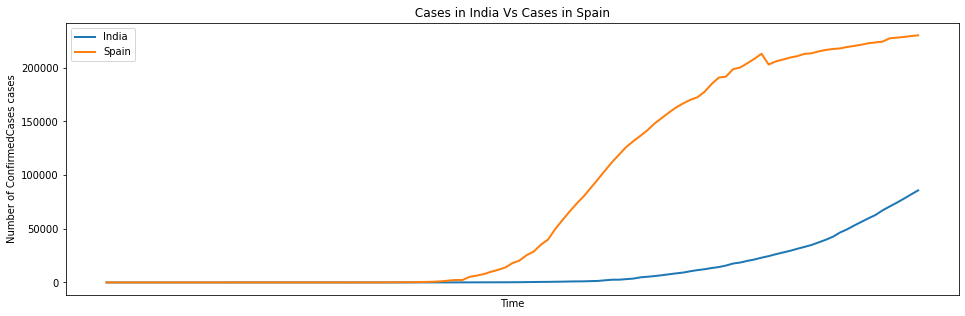

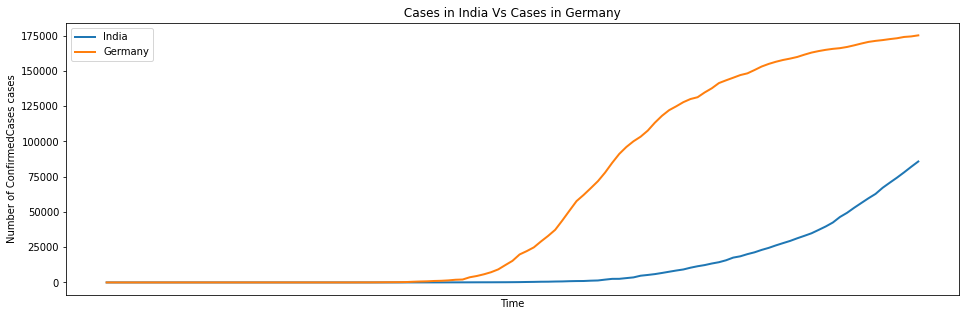

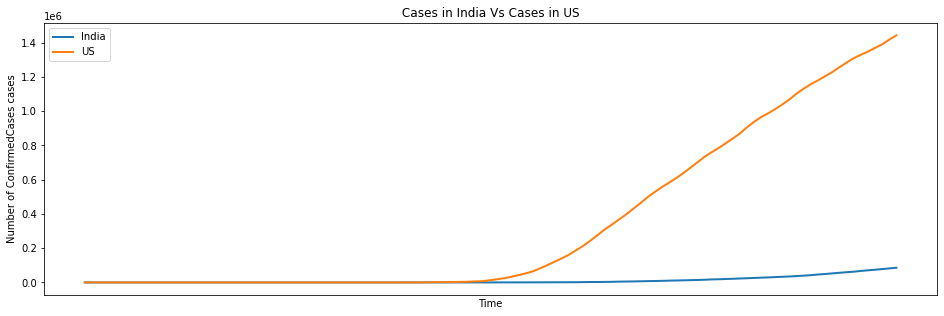

In [514]:
timeCompare(7,'India','China')
timeCompare(7,'India','Spain')
timeCompare(7,'India','Germany')
timeCompare(7,'India','US')

In [515]:
case='Fatalities'
def timeCompare_f(time,*argv):
    Coun1=argv[0]
    Coun2=argv[1]
    f,ax=plt.subplots(figsize=(16,5))
    labels=argv  
    country=df.loc[(df['Country_Region']==Coun1)]
    plt.plot(country['Date'],country[case],linewidth=2)
    plt.xticks([])
    plt.legend(labels)
    ax.set(title=' Evolution of actual cases',ylabel='Number of cases' )

    country2=df.loc[df['Country_Region']==Coun2]
    #country2['Date']=country2['Date']-datetime.timedelta(days=time)
    plt.plot(country2['Date'],country2[case],linewidth=2)
    #plt.xticks([])
    plt.legend(labels)
    ax.set(title=' Fatalities in India Vs Fatalities in %s '%argv[1] ,ylabel='Number of %s cases'%case, xlabel='Time' )

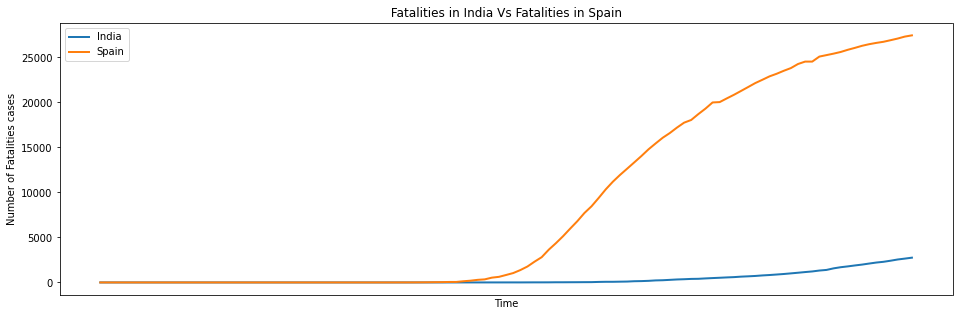

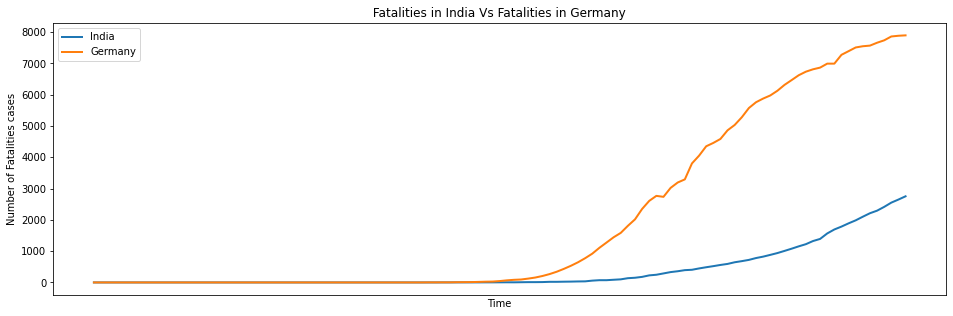

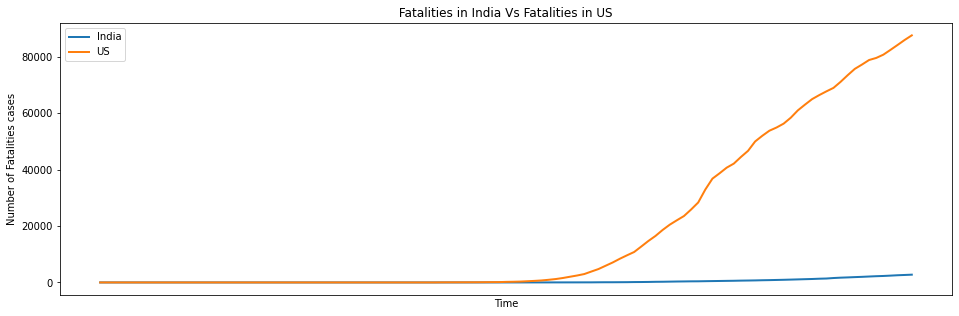

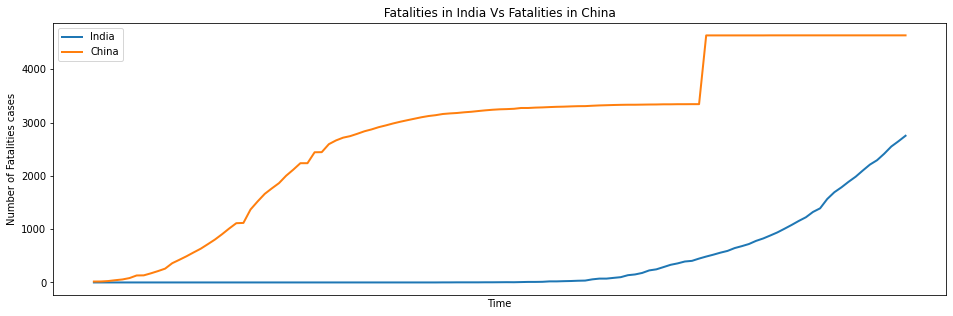

In [516]:
timeCompare_f(7,'India','Spain')
timeCompare_f(7,'India','Germany')
timeCompare_f(7,'India','US')
timeCompare_f(7,'India','China')

# ARIMA

In [517]:
def roll(country,case='ConfirmedCases'):
    ts=df.loc[(df['Country_Region']==country)]  
    ts=ts[['Date',case]]
    ts=ts.set_index('Date')
    ts.astype('int64')
    a=len(ts.loc[(ts['ConfirmedCases']>=10)])
    ts=ts[-a:]
    return (ts.rolling(window=4,center=False).mean().dropna())


def rollPlot(country, case='ConfirmedCases'):
    ts=df.loc[(df['Country_Region']==country)]  
    ts=ts[['Date',case]]
    ts=ts.set_index('Date')
    ts.astype('int64')
    a=len(ts.loc[(ts['ConfirmedCases']>=10)])
    ts=ts[-a:]
    plt.figure(figsize=(16,6))
    plt.plot(ts.rolling(window=7,center=False).mean().dropna(),label='Rolling Mean')
    plt.plot(ts[case])
    plt.plot(ts.rolling(window=7,center=False).std(),label='Rolling std')
    plt.legend()
    plt.title('Cases distribution in %s with rolling mean and standard' %country)
    plt.xticks([])

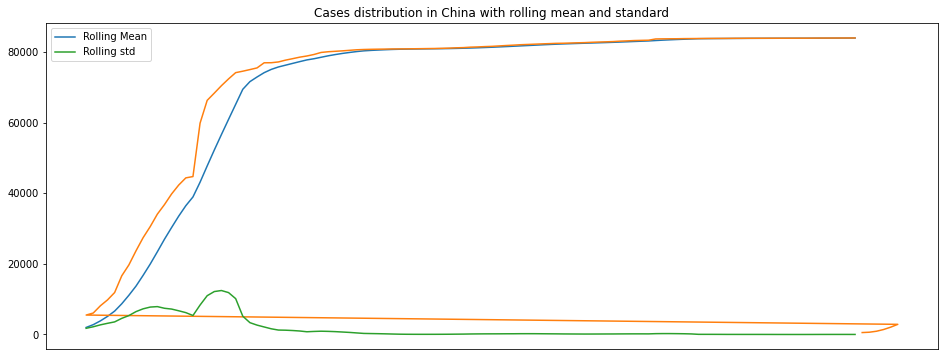

In [518]:
tsC1=roll('China')
rollPlot('China')

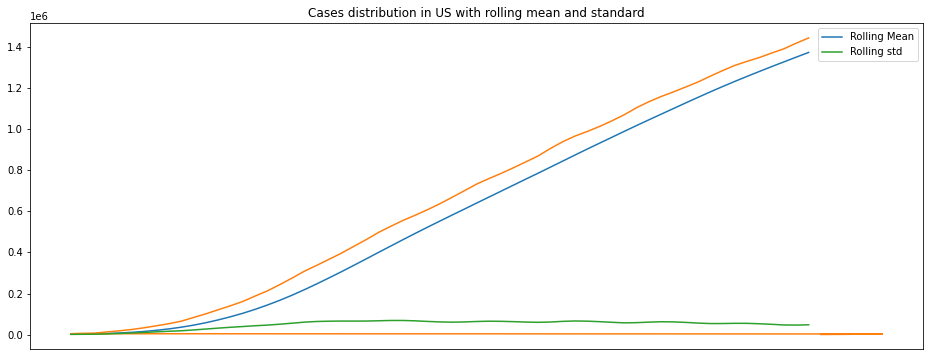

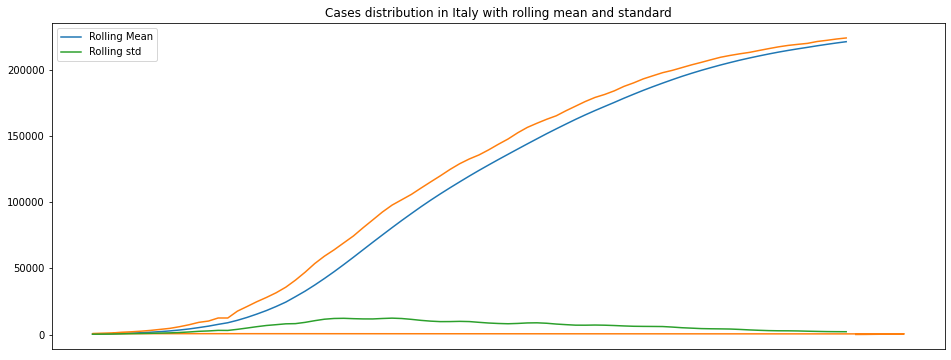

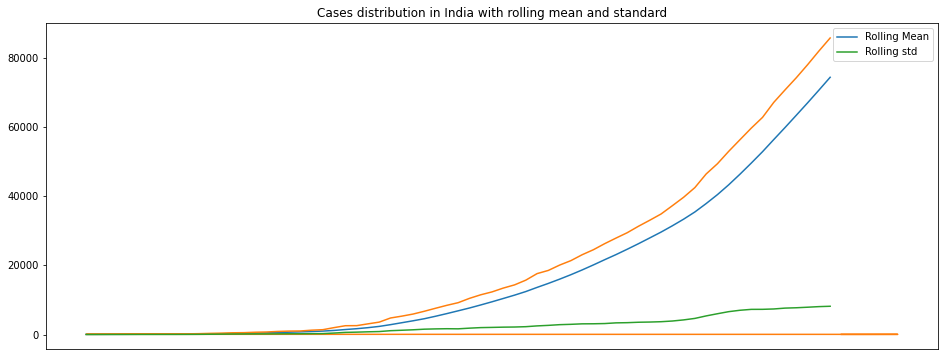

In [519]:
tsC2=roll('US')
rollPlot('US')

tsC3=roll('Italy')
rollPlot('Italy')

tsC6=roll('India')
rollPlot('India')

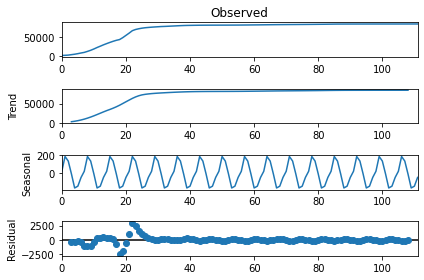

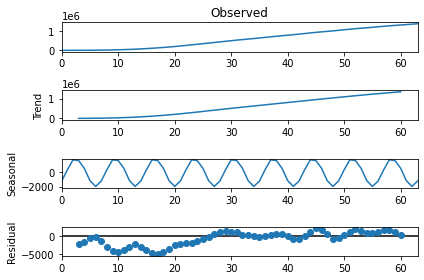

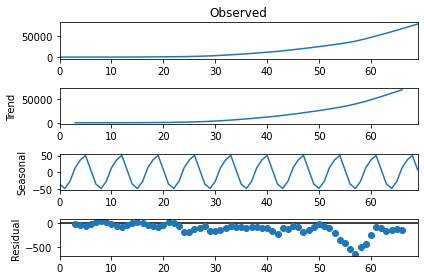

In [520]:
fig=sm.tsa.seasonal_decompose(tsC1.values,freq=7).plot()

fig=sm.tsa.seasonal_decompose(tsC2.values,freq=7).plot()

fig=sm.tsa.seasonal_decompose(tsC6.values,freq=7).plot()

In [521]:
def stationarity(ts):
    print('Results of Dickey-Fuller Test:')
    test = adfuller(ts, autolag='AIC')
    results = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for i,val in test[4].items():
        results['Critical Value (%s)'%i] = val
    print (results)

#For China
tsC=tsC1['ConfirmedCases'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                 -4.230209
p-value                         0.000585
#Lags Used                     13.000000
Number of Observations Used    98.000000
Critical Value (1%)            -3.498910
Critical Value (5%)            -2.891516
Critical Value (10%)           -2.582760
dtype: float64


In [522]:
tsC

array([  879.25,  1261.  ,  1819.5 ,  2966.75,  4137.  ,  5653.5 ,
        7384.75,  8980.25, 11616.  , 14509.75, 17986.  , 21873.25,
       25362.5 , 28961.  , 32237.75, 35335.  , 38276.75, 40845.75,
       42832.  , 47848.5 , 53849.5 , 59856.25, 66294.75, 69429.5 ,
       71392.75, 72944.25, 74085.25, 74864.25, 75561.75, 76162.5 ,
       76703.5 , 77254.5 , 77545.75, 77940.25, 78362.  , 78762.5 ,
       79204.  , 79588.  , 79921.25, 80178.75, 80330.  , 80468.5 ,
       80595.75, 80705.  , 80785.75, 80835.  , 80872.75, 80900.  ,
       80921.25, 80943.75, 80964.25, 80989.5 , 81017.75, 81049.  ,
       81087.25, 81141.5 , 81203.25, 81286.5 , 81372.  , 81457.25,
       81546.25, 81633.  , 81732.75, 81834.75, 81950.  , 82054.  ,
       82149.5 , 82240.  , 82317.5 , 82395.75, 82461.75, 82522.  ,
       82580.25, 82632.  , 82698.5 , 82768.75, 82837.75, 82911.75,
       82993.  , 83075.5 , 83166.75, 83252.25, 83319.5 , 83456.25,
       83576.5 , 83688.75, 83792.25, 83815.5 , 83835.75, 83855

Results of Dickey-Fuller Test:
Test Statistic                 -0.950660
p-value                         0.770832
#Lags Used                      9.000000
Number of Observations Used    54.000000
Critical Value (1%)            -3.557709
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  0.457264
p-value                         0.983515
#Lags Used                      9.000000
Number of Observations Used    60.000000
Critical Value (1%)            -3.544369
Critical Value (5%)            -2.911073
Critical Value (10%)           -2.593190
dtype: float64


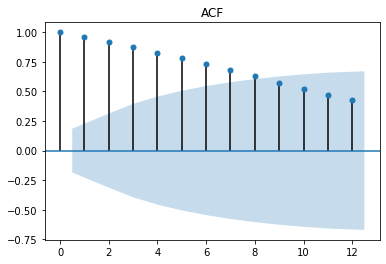

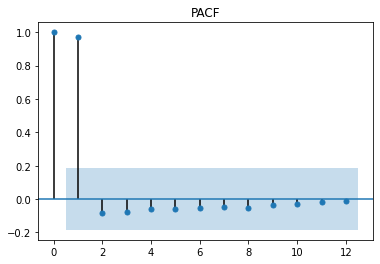

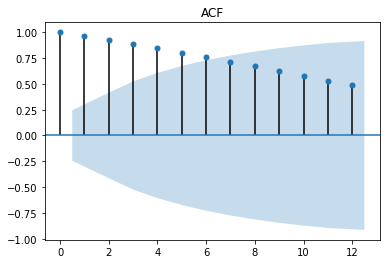

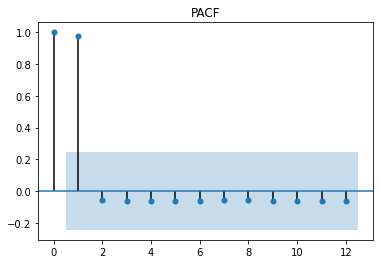

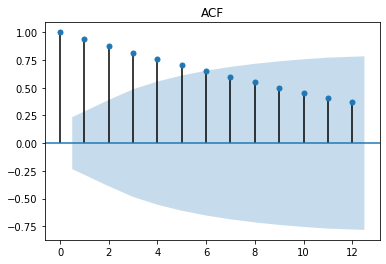

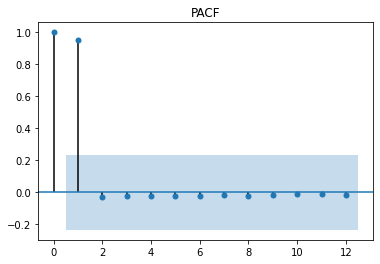

In [523]:
#For US
tsC=tsC2['ConfirmedCases'].values
stationarity(tsC)

#For INdia
tsC=tsC6['ConfirmedCases'].values
stationarity(tsC)

tsC7=tsC6['ConfirmedCases'].values

def corr(ts):
    plot_acf(ts,lags=12,title="ACF")
    plot_pacf(ts,lags=12,title="PACF")
    

#For China
corr(tsC1)

#For US
corr(tsC2)

#For India
corr(tsC6)

In [524]:
#test['Date'] = pd.to_datetime(test['Date'])
#train['Date'] = pd.to_datetime(train['Date'])
train = train.set_index(['Date'])
test = test.set_index(['Date'])

In [525]:
train.shape

(35995, 5)

In [526]:

def create_features(df,label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['Date'] = df.index
    df['hour'] = df['Date'].dt.hour
    df['dayofweek'] = df['Date'].dt.dayofweek
    df['quarter'] = df['Date'].dt.quarter
    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year
    df['dayofyear'] = df['Date'].dt.dayofyear
    df['dayofmonth'] = df['Date'].dt.day
    df['weekofyear'] = df['Date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
   
    return X

In [527]:
train_features=pd.DataFrame(create_features(train))
test_features=pd.DataFrame(create_features(test))
features_and_target_train = pd.concat([train,train_features], axis=1)
features_and_target_test = pd.concat([test,test_features], axis=1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def FunLabelEncoder(df):
    for c in df.columns:
        if df.dtypes[c] == object:
            le.fit(df[c].astype(str))
            df[c] = le.transform(df[c].astype(str))
    return df
features_and_target_train= FunLabelEncoder(features_and_target_train)

In [528]:
x_train= features_and_target_train[['Country_Region','month', 'dayofyear', 'dayofmonth' , 'weekofyear']]
y1 = features_and_target_train[['ConfirmedCases']]
y2 =features_and_target_train[['Fatalities']]
x_test = features_and_target_test[['Country_Region', 'month', 'dayofyear', 'dayofmonth' , 'weekofyear']]


In [529]:
tsC

array([3.075000e+01, 3.350000e+01, 3.675000e+01, 4.300000e+01,
       5.000000e+01, 5.850000e+01, 6.825000e+01, 7.975000e+01,
       9.250000e+01, 1.040000e+02, 1.190000e+02, 1.325000e+02,
       1.527500e+02, 1.840000e+02, 2.310000e+02, 2.910000e+02,
       3.672500e+02, 4.402500e+02, 5.220000e+02, 6.047500e+02,
       7.017500e+02, 8.145000e+02, 9.062500e+02, 1.037250e+03,
       1.164750e+03, 1.417500e+03, 1.797250e+03, 2.126250e+03,
       2.547500e+03, 2.945000e+03, 3.503750e+03, 4.189750e+03,
       4.898250e+03, 5.682500e+03, 6.387500e+03, 7.171250e+03,
       7.993500e+03, 8.925500e+03, 9.897750e+03, 1.086675e+04,
       1.192300e+04, 1.289775e+04, 1.395650e+04, 1.527975e+04,
       1.655700e+04, 1.798900e+04, 1.940100e+04, 2.076650e+04,
       2.226425e+04, 2.381500e+04, 2.544500e+04, 2.703850e+04,
       2.873700e+04, 3.043175e+04, 3.217500e+04, 3.412650e+04,
       3.622025e+04, 3.858100e+04, 4.147450e+04, 4.451025e+04,
       4.783225e+04, 5.129375e+04, 5.460825e+04, 5.7960

In [530]:
dd2=pd.DataFrame(columns=['MAPE','MSE','RMSE'])
dd2

,MAPE,MSE,RMSE


                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   57
Model:                 ARIMA(1, 2, 5)   Log Likelihood                -323.449
Method:                       css-mle   S.D. of innovations             61.989
Date:                Wed, 14 Dec 2022   AIC                            662.897
Time:                        09:15:39   BIC                            679.242
Sample:                             2   HQIC                           669.249
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        119.1416    101.193      1.177      0.239     -79.192     317.475
ar.L1.D2.y     0.8719      0.118      7.371      0.000       0.640       1.104
ma.L1.D2.y    -0.5425      0.115     -4.725      0.0

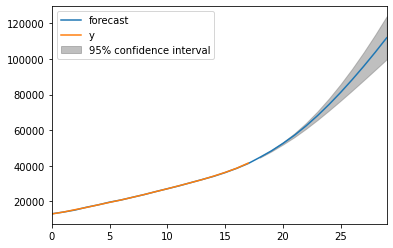

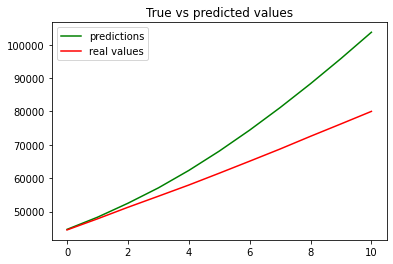

In [531]:
#Mean absolute percentage error

from sklearn.metrics import r2_score
def r2score(y1, y_pred): 
    y1, y_pred = np.array(y1), np.array(y_pred)
    return r2_score(y1, y_pred)

def mape(y1, y_pred): 
    y1, y_pred = np.array(y1), np.array(y_pred)
    return np.mean(np.abs((y1 - y_pred) / y1)) * 100
def mse(y1, y_pred): 
    y1, y_pred = np.array(y1), np.array(y_pred)
    return np.mean((y1 - y_pred)**2)

def rmse(y1, y_pred): 
    y1, y_pred = np.array(y1), np.array(y_pred)
    return np.sqrt(np.mean((y1 - y_pred)**2))




def split(ts):
    size = int(len(ts) * 0.85)
    train= ts[:size]
    test = ts[size:]
    return(train,test)

def arima(ts,test):
    p=d=q=range(0,6)
    a=99999
    pdq=list(itertools.product(p,d,q))
    
    #Determining the best parameters
    for var in pdq:
        try:
            model = ARIMA(ts, order=var)
            result = model.fit()

            if (result.aic<=a) :
                a=result.aic
                param=var
        except:
            continue
            
    #Modeling
    model = ARIMA(ts, order=param)
    result = model.fit()
    result.plot_predict(start=int(len(ts) * 0.7), end=int(len(ts) * 1.2))
    pred=result.forecast(steps=len(test))[0]
    #Plotting results
    f,ax=plt.subplots()
    plt.plot(pred,c='green', label= 'predictions')
    plt.plot(test, c='red',label='real values')
    plt.legend()
    plt.title('True vs predicted values')
    #Printing the error metrics
    print(result.summary())        
    
    print('\nMean absolute percentage error: %f'%mape(test,pred))
    print("Mean Square Error error using ARIMA: ",mse(test,pred))
    print("Root Mean Square error using ARIMA: ",rmse(test,pred))
    print("R2 Score  using ARIMA: ",r2score(test,pred))
    lis=[mape(test,pred),mse(test,pred), rmse(test,pred)]
    dd2=pd.DataFrame({'MAPE': [mape(test,pred)], 'MSE': [mse(test,pred)], 'RMSE': [rmse(test,pred)]})
    return (pred,dd2)

train,test=split(tsC)
pred,dd2=arima(train,test)

In [532]:
dd2.rename({0:'ARIMA'})

,MAPE,MSE,RMSE
ARIMA,12.359226,1.369033e+08,11700.56851


In [533]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 5
n_features = 1
NtsC=np.reshape(train,(-1,1))
test2=np.reshape(test,(-1,1))

generator = TimeseriesGenerator(NtsC, NtsC, length=n_input, batch_size=1)

In [534]:
test2.shape

(11, 1)

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,Bidirectional

model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [536]:
model.summary()

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_66 (LSTM)               (None, 128)               66560     
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


Epoch 1/25
54/54 [==============================] - 1s 12ms/step - loss: 72372664.0503
Epoch 2/25
54/54 [==============================] - 0s 5ms/step - loss: 4899413.2710
Epoch 3/25
54/54 [==============================] - 0s 4ms/step - loss: 1509783.7613
Epoch 4/25
54/54 [==============================] - 0s 4ms/step - loss: 2019234.3004
Epoch 5/25
54/54 [==============================] - 0s 4ms/step - loss: 6071080.7568
Epoch 6/25
54/54 [==============================] - 0s 5ms/step - loss: 4545887.0824
Epoch 7/25
54/54 [==============================] - 0s 4ms/step - loss: 1588471.5681
Epoch 8/25
54/54 [==============================] - 0s 4ms/step - loss: 1079134.0756
Epoch 9/25
54/54 [==============================] - 0s 4ms/step - loss: 1125982.7777
Epoch 10/25
54/54 [==============================] - 0s 4ms/step - loss: 2149755.3300
Epoch 11/25
54/54 [==============================] - 0s 4ms/step - loss: 692882.6349
Epoch 12/25
54/54 [==============================] - 0s 5ms/st

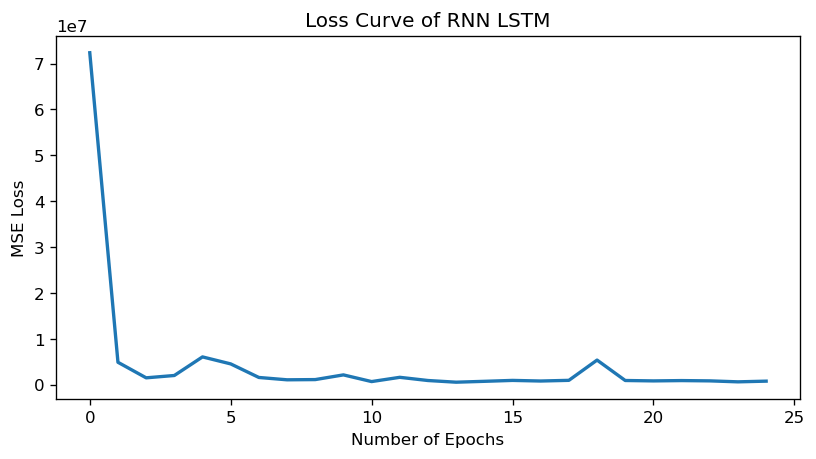

In [537]:
model.fit_generator(generator,epochs=25)
loss_per_epoch = model.history.history['loss']
fig = plt.figure(dpi = 120,figsize = (8,4))
ax = plt.axes()
ax.set(xlabel = 'Number of Epochs',ylabel = 'MSE Loss',title = 'Loss Curve of RNN LSTM')
plt.plot(range(len(loss_per_epoch)),loss_per_epoch,lw = 2)

In [538]:
test_predictions = []

first_eval_batch = NtsC[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test2)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)     
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


In [539]:
test_predictions=np.ravel(test_predictions)

In [540]:
pred=pd.DataFrame(columns={"current","prediction"})

In [541]:
pred["current"]=test
pred["prediction"]=test_predictions

In [542]:
pred

,prediction,current
0,42071.441406,44510.25
1,44511.023438,47832.25
2,47025.355469,51293.75
3,49527.191406,54608.25
4,51971.703125,57960.25
5,54386.246094,61503.75
6,57290.480469,65108.00
7,60258.765625,68757.25
8,63303.421875,72569.00
9,66477.734375,76278.00


In [543]:
dd3=pd.DataFrame(columns=['MAPE','MSE','RMSE'])
dd3

,MAPE,MSE,RMSE


In [544]:
def mape(y1, y_pred): 
    y1, y_pred = np.array(y1), np.array(y_pred)
    return np.mean(np.abs((y1 - y_pred) / y1)) * 100

def mse(y1, y_pred): 
    y1, y_pred = np.array(y1), np.array(y_pred)
    return np.mean((y1 - y_pred)**2)

def rmse(y1, y_pred): 
    y1, y_pred = np.array(y1), np.array(y_pred)
    return np.sqrt(np.mean((y1 - y_pred)**2))
def r2score(y1, y_pred): 
    y1, y_pred = np.array(y1), np.array(y_pred)
    return r2_score(y1, y_pred)

print("Mean absolute % error using LSTM: ",mape(pred["current"],pred["prediction"]))
print("Mean Square Error error using LSTM: ",mse(pred["current"],pred["prediction"]))
print("Root Mean Square error using LSTM: ",rmse(pred["current"],pred["prediction"]))
print("R2 score using LSTM: ",r2score(pred["current"],pred["prediction"]))
dd3=pd.DataFrame({'MAPE': [mape(pred["current"],pred["prediction"])], 'MSE': [mse(pred["current"],pred["prediction"])], 'RMSE': [rmse(pred["current"],pred["prediction"])]}, index=[1])


Mean absolute % error using LSTM:  10.424112352576618
Mean Square Error error using LSTM:  51504166.8515084
Root Mean Square error using LSTM:  7176.64035963266
R2 score using LSTM:  0.591903570599188


In [545]:
dd3.rename({1:'LSTM'})

,MAPE,MSE,RMSE
LSTM,10.424112,5.150417e+07,7176.64036


In [546]:
dd4=pd.concat([dd2,dd3])

In [547]:
dd4.rename({0:'ARIMA', 1:'LSTM'})

,MAPE,MSE,RMSE
ARIMA,12.359226,1.369033e+08,11700.56851
LSTM,10.424112,5.150417e+07,7176.64036


Text(0.5, 1.0, 'True vs predicted values')

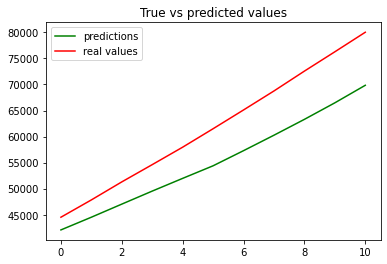

In [548]:
f,ax=plt.subplots()
plt.plot(test_predictions,c='green', label= 'predictions')

plt.plot(test, c='red',label='real values')
plt.legend()
plt.title('True vs predicted values')

In [3]:
n_input = 5
n_features = 1

Epoch 1/25
65/65 [==============================] - 1s 11ms/step - loss: 243715638.9181
Epoch 2/25
65/65 [==============================] - 0s 4ms/step - loss: 20522522.2580
Epoch 3/25
65/65 [==============================] - 0s 6ms/step - loss: 13686615.9134
Epoch 4/25
65/65 [==============================] - 0s 5ms/step - loss: 14941450.7970
Epoch 5/25
65/65 [==============================] - 0s 5ms/step - loss: 3331485.0488
Epoch 6/25
65/65 [==============================] - 0s 5ms/step - loss: 6176088.8382
Epoch 7/25
65/65 [==============================] - 0s 4ms/step - loss: 5743600.5088
Epoch 8/25
65/65 [==============================] - 0s 5ms/step - loss: 5698048.2981
Epoch 9/25
65/65 [==============================] - 0s 5ms/step - loss: 2015698.1919
Epoch 10/25
65/65 [==============================] - 0s 4ms/step - loss: 4832654.2540
Epoch 11/25
65/65 [==============================] - 0s 5ms/step - loss: 2006326.5515
Epoch 12/25
65/65 [==============================] - 0s 5

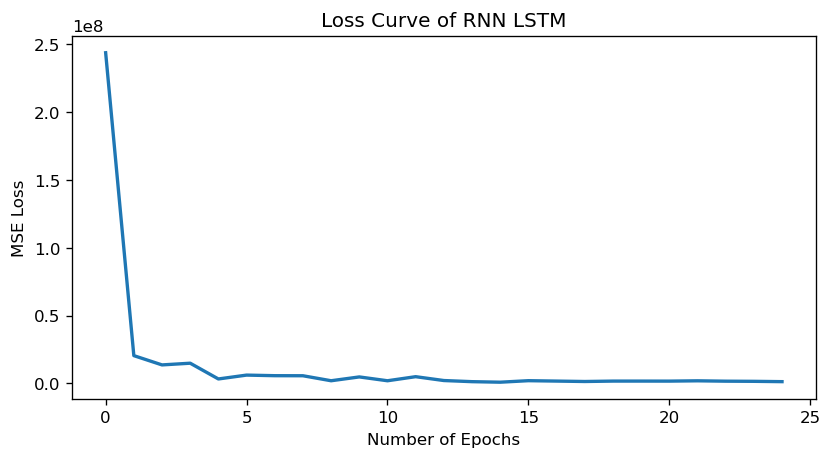

In [549]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 5
n_features = 1
NtsC=np.reshape(tsC,(-1,1))

generator = TimeseriesGenerator(NtsC, NtsC, length=n_input, batch_size=1)

model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit_generator(generator,epochs=25)
loss_per_epoch = model.history.history['loss']
fig = plt.figure(dpi = 120,figsize = (8,4))
ax = plt.axes()
ax.set(xlabel = 'Number of Epochs',ylabel = 'MSE Loss',title = 'Loss Curve of RNN LSTM')
plt.plot(range(len(loss_per_epoch)),loss_per_epoch,lw = 2)



Stacked_representation

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM,Bidirectional

model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(n_input, n_features)))
model.add(LSTM(128, activation='relu', input_shape=(n_input, n_features)))
model.add(Droput(0.3))
model.add(LSTM(64, activation='relu', input_shape=(n_input, n_features)))
model.add(Droput(0.3))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [551]:
forecast = []

first_eval_batch = NtsC[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(15):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)



In [552]:
forecast = pd.DataFrame({'Forecast':np.ravel(forecast)})
forecast.index = np.arange('2020-05-15',15,dtype='datetime64[D]')
forecast

,Forecast
2020-05-15,83419.859375
2020-05-16,87744.140625
2020-05-17,92145.187500
2020-05-18,96626.218750
2020-05-19,101256.781250
2020-05-20,106169.320312
2020-05-21,111432.039062
2020-05-22,116878.703125
2020-05-23,122558.242188
2020-05-24,128526.796875
